# Enviromental Data

## Intro

For this project I wanted to look at an enviromental POV so I am using neighborhoods with the most trees the best neighborhood in Pittsburgh.

## the metric
I used these data set(https://data.wprdc.org/dataset/city-trees/resource/1515a93c-73e3-4425-9b35-1cd11b2196da) that shows all the trees in Pittsburgh and their location. 

## the analysis
First I looked at trees and removed all the trees that are in poor condition, then removed all the data except for the neighborhoods and conditions. I 

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

tree_data = pd.read_csv("trees.csv")
tree_data = tree_data.query('condition == "Good" or condition== "Fair"')
tree_data = tree_data.filter(items=["neighborhood"])
tree_data

,neighborhood
2,South Side Flats
3,East Allegheny
4,Highland Park
5,Highland Park
6,Highland Park
...,...
28789,Mount Washington
28790,Mount Washington
28791,Mount Washington
28792,Mount Washington


Then I grouped the trees by neighborhood.

In [14]:
neighborhood_trees = tree_data.value_counts(ascending=False)
neighborhood_trees = pd.DataFrame(neighborhood_trees, columns=["trees"])
neighborhood_trees

,trees
neighborhood,
Squirrel Hill South,1611
Squirrel Hill North,1142
South Side Flats,1109
Shadyside,882
Bloomfield,862
...,...
Northview Heights,3
East Carnegie,3
Esplen,1


Then I took the top 10 neighborhood to look at the results and plotted it on a bar graph to get a better visual.

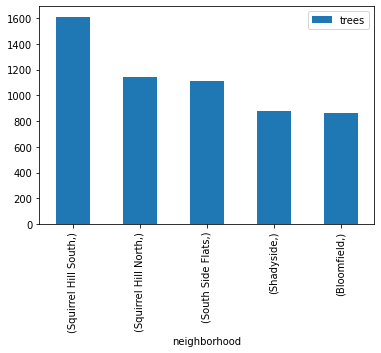

In [16]:
neighborhood_trees_top = neighborhood_trees.head(5)
neighborhood_trees_top.plot.bar()

# conclusion
From looking at the tree data sets, Squirrel Hill South has the most trees by a good portion. It overtakes the other four, which have relatively similar number of trees, by at least 400 trees.

In [ ]:
##this is the merge code
dict = {'neighborhood':[],
        'trees':[]
       }
df = pd.DataFrame(dict)
##n is the list of top n cities from the first filter of crime
n = ["Squirrel Hill South", "Squirrel Hill North", "Shadyside", "Northview Heights", "South Shore", "Highland Park", "Sheraden", "Elliott", "Bloomfield"]
for x in n:
    result = neighborhood_trees.loc[x]
    df.loc[len(df.index)] = [x, result.iloc[0, 0]]
df = df.sort_values(by=['trees'], ascending=False)
df